In [1]:
import os
import pandas as pd
import numpy as np
import gower
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.style
import matplotlib as mpl

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
data = pd.read_csv('car_insurance_claim.csv')
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [3]:
len(data['BIRTH'].iloc[0])

7

In [4]:
data.shape

(10302, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

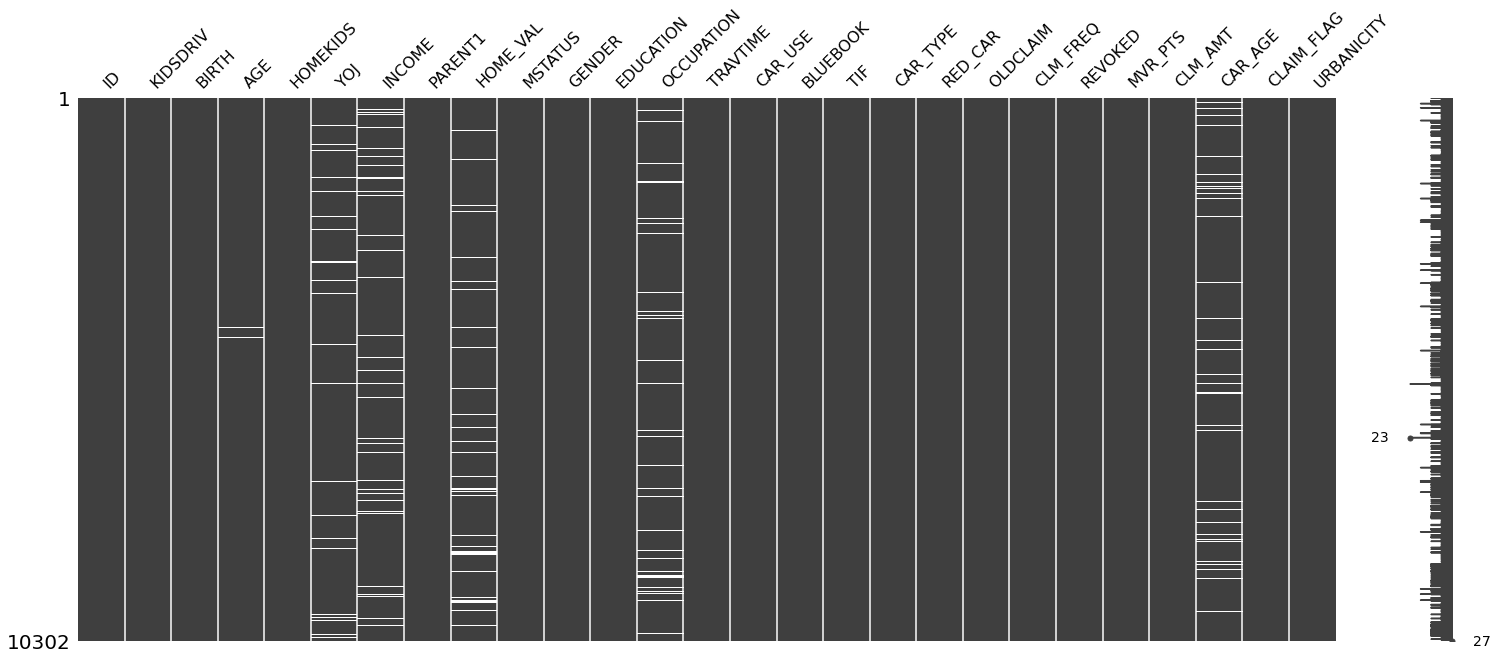

In [6]:
import missingno as msno
msno.matrix(data)

In [7]:
data.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [8]:
#SEQUENCE OF HANDLING DATA ISSUES (IMPORTANT!)
#inconsistent & intentional data -> noisy data -> missing data
#for inconsistent data & intentional data, can use unique() method
#for noisy data, can use distplot(). It would be great if can use multiplot but sometimes when data is too big, view presented
#using multiplot is too small to view data issues. So have to use plot one by one

In [9]:
#intentional data like z_ & $ symbol
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [10]:
# convert numerical-object (supposed to be numericals, but assigned object due to some symbols) to numericals
for col in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM', 'CLM_AMT',]:
    data[col] = data[col].replace('[^.0-9]', '', regex=True,).astype(float).fillna(0.0)

# cleaning textual classes (removing characters like z_, /, etc.)
for col in data.select_dtypes(include='object').columns:
        data[col] = data[col].str.upper().replace('Z_','',regex=True).replace('[^A-Z]','',regex=True)

data_types = {f:t for f,t in zip(data.columns,data.dtypes)}
data

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,MAR,60.0,0,11.0,67349.0,NO,0.0,NO,...,MINIVAN,YES,4461.0,2,NO,3,0.0,18.0,0,HIGHLYURBANURBAN
1,132761049,0,JAN,43.0,0,11.0,91449.0,NO,257252.0,NO,...,MINIVAN,YES,0.0,0,NO,0,0.0,1.0,0,HIGHLYURBANURBAN
2,921317019,0,NOV,48.0,0,11.0,52881.0,NO,0.0,NO,...,VAN,YES,0.0,0,NO,2,0.0,10.0,0,HIGHLYURBANURBAN
3,727598473,0,MAR,35.0,1,10.0,16039.0,NO,124191.0,YES,...,SUV,NO,38690.0,2,NO,3,0.0,10.0,0,HIGHLYURBANURBAN
4,450221861,0,JUN,51.0,0,14.0,0.0,NO,306251.0,YES,...,MINIVAN,YES,0.0,0,NO,0,0.0,6.0,0,HIGHLYURBANURBAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,AUG,45.0,2,9.0,164669.0,NO,386273.0,YES,...,MINIVAN,NO,0.0,0,NO,2,0.0,17.0,0,HIGHLYURBANURBAN
10298,61970712,0,JUN,46.0,0,9.0,107204.0,NO,332591.0,YES,...,PANELTRUCK,NO,0.0,0,NO,0,0.0,1.0,0,HIGHLYURBANURBAN
10299,849208064,0,JUN,48.0,0,15.0,39837.0,NO,170611.0,YES,...,SUV,NO,0.0,0,NO,0,0.0,1.0,0,HIGHLYURBANURBAN
10300,627828331,0,DEC,50.0,0,7.0,43445.0,NO,149248.0,YES,...,MINIVAN,NO,0.0,0,NO,0,0.0,11.0,0,HIGHLYURBANURBAN


In [11]:
data.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME          0
PARENT1         0
HOME_VAL        0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [12]:
# impute missing values
data['OCCUPATION'].fillna('OTHER',inplace=True)
for col in ['AGE','YOJ','CAR_AGE']:
    data[col].fillna(data[col].mean(),inplace=True)

In [13]:
data.isnull().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [14]:
# drop irrelevant columns, ID and Birth
data.drop(labels=['ID','BIRTH'],axis=1,inplace=True)

In [15]:
data_meta = pd.DataFrame(data.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_meta.columns = ['name','num']
data_meta['type'] = 'numerical'
data_meta

,name,num,type
0,CAR_USE,2,numerical
1,REVOKED,2,numerical
2,RED_CAR,2,numerical
3,CLAIM_FLAG,2,numerical
4,GENDER,2,numerical
5,MSTATUS,2,numerical
6,URBANICITY,2,numerical
7,PARENT1,2,numerical
8,EDUCATION,4,numerical
9,KIDSDRIV,5,numerical


In [16]:
# categorical, numerical and claim assignment for type
data_meta.loc[(data_meta['num']<=15) & (~data_meta['name'].isin(['MVR_PTS','CLM_FREQ','CLM_AMT','CLAIM_FLAG'])),'type']='categorical'
data_meta.loc[data_meta['name'].isin(['CLM_AMT','CLAIM_FLAG']),'type']='claim'
data_meta

,name,num,type
0,CAR_USE,2,categorical
1,REVOKED,2,categorical
2,RED_CAR,2,categorical
3,CLAIM_FLAG,2,claim
4,GENDER,2,categorical
5,MSTATUS,2,categorical
6,URBANICITY,2,categorical
7,PARENT1,2,categorical
8,EDUCATION,4,categorical
9,KIDSDRIV,5,categorical


In [17]:
#creating lists of categorical features and numerical features
categorical_features = list(data_meta.loc[data_meta['type']=='categorical','name'])
numerical_features = list(data_meta.loc[data_meta['type']=='numerical','name'])

In [18]:
# shorten categorical value names
data['URBANICITY'] = data['URBANICITY'].map({'HIGHLYURBANURBAN':'URBAN',
                                           'HIGHLYRURALRURAL':'RURAL'})
data['EDUCATION'] = data['EDUCATION'].map({'HIGHSCHOOL':'HSCL',
                                         'BACHELORS':'BSC',
                                         'MASTERS':'MSC',
                                         'PHD':'PHD'})
data['CAR_TYPE'] = data['CAR_TYPE'].map({'MINIVAN':'MVAN', 
                                       'VAN':'VAN', 
                                       'SUV':'SUV',
                                       'SPORTSCAR':'SPRT',
                                       'PANELTRUCK':'PTRK', 
                                       'PICKUP':'PKUP'})
data

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,NO,0.0,NO,M,PHD,...,MVAN,YES,4461.0,2,NO,3,0.0,18.0,0,URBAN
1,0,43.0,0,11.0,91449.0,NO,257252.0,NO,M,HSCL,...,MVAN,YES,0.0,0,NO,0,0.0,1.0,0,URBAN
2,0,48.0,0,11.0,52881.0,NO,0.0,NO,M,BSC,...,VAN,YES,0.0,0,NO,2,0.0,10.0,0,URBAN
3,0,35.0,1,10.0,16039.0,NO,124191.0,YES,F,HSCL,...,SUV,NO,38690.0,2,NO,3,0.0,10.0,0,URBAN
4,0,51.0,0,14.0,0.0,NO,306251.0,YES,M,HSCL,...,MVAN,YES,0.0,0,NO,0,0.0,6.0,0,URBAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.0,NO,386273.0,YES,M,PHD,...,MVAN,NO,0.0,0,NO,2,0.0,17.0,0,URBAN
10298,0,46.0,0,9.0,107204.0,NO,332591.0,YES,M,MSC,...,PTRK,NO,0.0,0,NO,0,0.0,1.0,0,URBAN
10299,0,48.0,0,15.0,39837.0,NO,170611.0,YES,F,HSCL,...,SUV,NO,0.0,0,NO,0,0.0,1.0,0,URBAN
10300,0,50.0,0,7.0,43445.0,NO,149248.0,YES,F,BSC,...,MVAN,NO,0.0,0,NO,0,0.0,11.0,0,URBAN


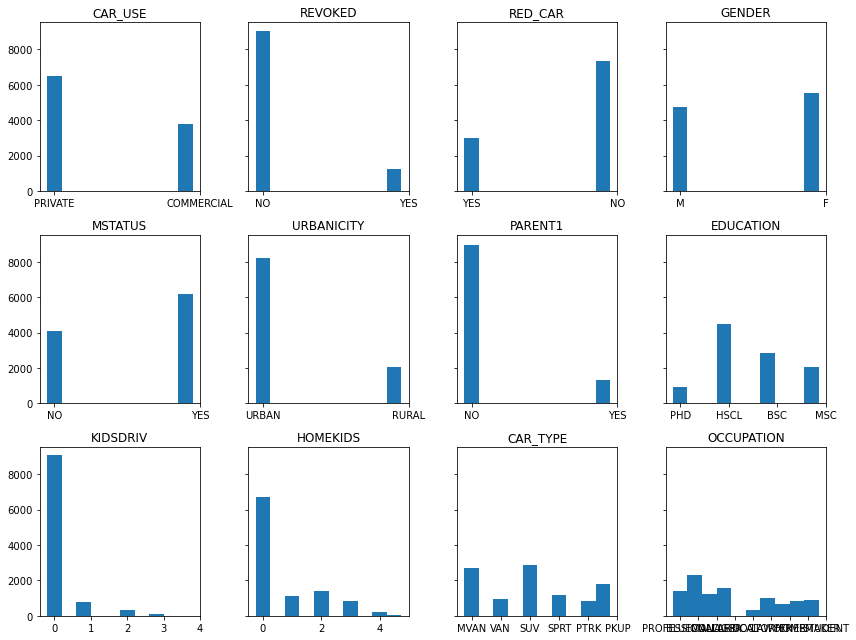

In [19]:
#Categorical feature histograms
#Shown below are the histogram of each categorical feature. This illustrates both the number and frequency of each category in the dataset.
fig,axs = plt.subplots(3,4,figsize=(12,9),sharey=True)

for ax,feat in zip(axs.flatten(),categorical_features):
    ax.hist(data[feat],align='left')
    ax.set_title(feat)
plt.tight_layout()

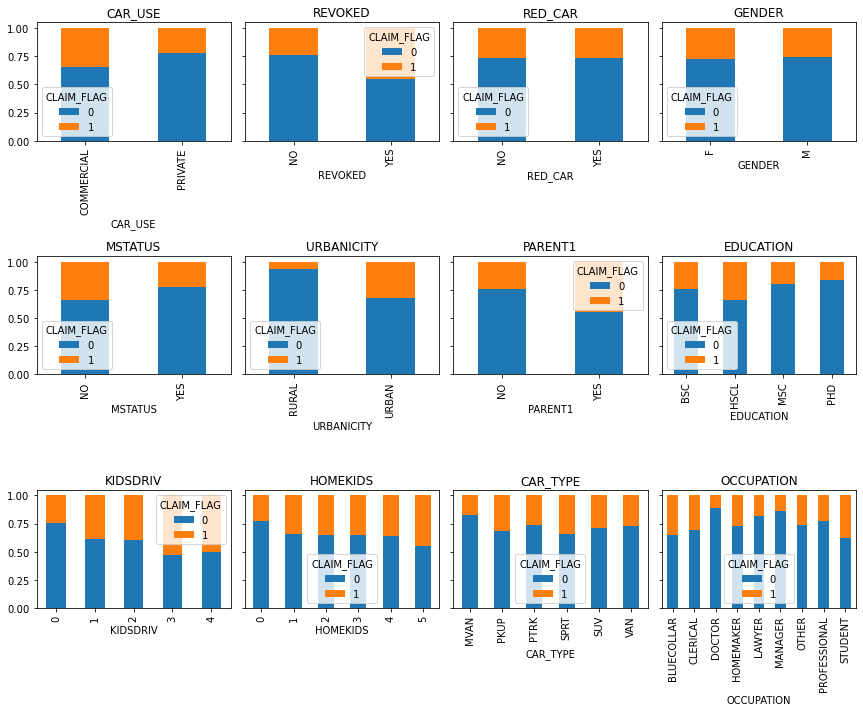

In [20]:
#How are claims distributed amongst the categorical features?
#As above, the bar plots again illustrate each categorical feature and value, but now also show how the proportion of claims is distributed to each categorical value. For example, Commericial CAR_USE has a relatively higher proportion of claims than Private car use.
fig,axs = plt.subplots(3,4,figsize=(12,10),sharey=True)

for ax,feat in zip(axs.flatten(),categorical_features):
    ((pd.crosstab(data['CLAIM_FLAG'],data[feat])) / (pd.crosstab(data['CLAIM_FLAG'],data[feat]).sum())).T.plot.bar(stacked=True,ax=ax,legend=True,title=None)
    ax.set_title(feat)
plt.tight_layout()

In [21]:
#Modify phase, scaling numerical features
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler

In [22]:
data[numerical_features][:2]

,CLM_FREQ,MVR_PTS,YOJ,TIF,CAR_AGE,AGE,TRAVTIME,BLUEBOOK,OLDCLAIM,HOME_VAL,INCOME
0,2,3,11.0,11,18.0,60.0,14,14230.0,4461.0,0.0,67349.0
1,0,0,11.0,1,1.0,43.0,22,14940.0,0.0,257252.0,91449.0


In [23]:
#StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.
# Standard Scaled "mean normalisation"
scaler = StandardScaler()
scaler.fit(data[numerical_features])
print("Feature Means:\t",[f"{x:.2}" for x in scaler.mean_])
numerical_data = scaler.transform(data[numerical_features])
numerical_data = pd.DataFrame(numerical_data,index=data.index,columns=numerical_features)
numerical_data[:2]

Feature Means:	 ['0.8', '1.7', '1e+01', '5.3', '8.3', '4.5e+01', '3.3e+01', '1.6e+04', '4e+03', '1.5e+05', '5.8e+04']


,CLM_FREQ,MVR_PTS,YOJ,TIF,CAR_AGE,AGE,TRAVTIME,BLUEBOOK,OLDCLAIM,HOME_VAL,INCOME
0,1.039219,0.597453,0.131552,1.379567,1.753103,1.762458,-1.223551,-0.169656,0.048899,-1.118502,0.190439
1,-0.693850,-0.792137,0.131552,-1.053171,-1.318759,-0.213574,-0.719421,-0.085417,-0.461938,0.853671,0.690195


In [24]:
# MinMax scaled
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data[numerical_features])
numerical_data = scaler.transform(data[numerical_features])
numerical_data = pd.DataFrame(numerical_data,index=data.index,columns=numerical_features)
numerical_data[:2]

,CLM_FREQ,MVR_PTS,YOJ,TIF,CAR_AGE,AGE,TRAVTIME,BLUEBOOK,OLDCLAIM,HOME_VAL,INCOME
0,0.4,0.230769,0.478261,0.416667,0.677419,0.676923,0.065693,0.186547,0.078212,0.000000,0.183497
1,0.0,0.000000,0.478261,0.000000,0.129032,0.415385,0.124088,0.196952,0.000000,0.290588,0.249159


In [25]:
#Scaling categorical features
# you can use map
data['KIDSDRIV'] = data['KIDSDRIV'].map({0:0,1:1,2:2,3:2,4:2})
# or pd.cut()
data['HOMEKIDS']= pd.cut(data['HOMEKIDS'],
                       bins=[0,1,2,3,4,10],
                       labels=[0,1,2,3,4],
                       include_lowest=True,
                       right=True).astype(float)

In [26]:
# create some lists
ordinal_features = ['EDUCATION','KIDSDRIV','HOMEKIDS']
print("Ordinals:\n",ordinal_features)

# apply order to education
data['EDUCATION'] = data['EDUCATION'].map({'HSCL':0, 'BSC':1, 'MSC':2,'PHD':3})
ordinal_data = data[ordinal_features]

# MinMax scaled
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data[ordinal_features])
ordinal_data = scaler.transform(data[ordinal_features])
ordinal_data= pd.DataFrame(ordinal_data,index=data.index,columns=ordinal_features)
ordinal_data[:2]

Ordinals:
 ['EDUCATION', 'KIDSDRIV', 'HOMEKIDS']


,EDUCATION,KIDSDRIV,HOMEKIDS
0,1.0,0.0,0.0
1,0.0,0.0,0.0


In [27]:
# For the nominals, one-hot-encoding is applied
nominal_features = [c for c in categorical_features if c not in ordinal_features]
print("Nominals:\n",nominal_features)

nominal_data = list()
for i,x in data[nominal_features].nunique().iteritems():
    if x <= 2:
        nominal_data.append(pd.get_dummies(data[[i]],drop_first=True))
    elif x > 2:
        nominal_data.append(pd.get_dummies(data[[i]],drop_first=False))
        
nominal_data = pd.concat(nominal_data,axis=1)
nominal_data[:2]

Nominals:
 ['CAR_USE', 'REVOKED', 'RED_CAR', 'GENDER', 'MSTATUS', 'URBANICITY', 'PARENT1', 'CAR_TYPE', 'OCCUPATION']


,CAR_USE_PRIVATE,REVOKED_YES,RED_CAR_YES,GENDER_M,MSTATUS_YES,URBANICITY_URBAN,PARENT1_YES,CAR_TYPE_MVAN,CAR_TYPE_PKUP,CAR_TYPE_PTRK,...,CAR_TYPE_VAN,OCCUPATION_BLUECOLLAR,OCCUPATION_CLERICAL,OCCUPATION_DOCTOR,OCCUPATION_HOMEMAKER,OCCUPATION_LAWYER,OCCUPATION_MANAGER,OCCUPATION_OTHER,OCCUPATION_PROFESSIONAL,OCCUPATION_STUDENT
0,1,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
#Final datasets for clustering
# transformed and scaled dataset
Xy_scaled = pd.concat([numerical_data,nominal_data,ordinal_data],axis=1)
print(f'Data min:max {Xy_scaled.min().min(),Xy_scaled.max().max()}')

# original data
Xy_original = data[numerical_features+nominal_features+ordinal_features].copy()

Data min:max (0.0, 1.0)


In [32]:
Xy_original.dtypes

CLM_FREQ        int64
MVR_PTS         int64
YOJ           float64
TIF             int64
CAR_AGE       float64
AGE           float64
TRAVTIME        int64
BLUEBOOK      float64
OLDCLAIM      float64
HOME_VAL      float64
INCOME        float64
CAR_USE        object
REVOKED        object
RED_CAR        object
GENDER         object
MSTATUS        object
URBANICITY     object
PARENT1        object
CAR_TYPE       object
OCCUPATION     object
EDUCATION       int64
KIDSDRIV        int64
HOMEKIDS      float64
dtype: object

In [31]:
Xy_scaled.dtypes

CLM_FREQ                   float64
MVR_PTS                    float64
YOJ                        float64
TIF                        float64
CAR_AGE                    float64
AGE                        float64
TRAVTIME                   float64
BLUEBOOK                   float64
OLDCLAIM                   float64
HOME_VAL                   float64
INCOME                     float64
CAR_USE_PRIVATE              uint8
REVOKED_YES                  uint8
RED_CAR_YES                  uint8
GENDER_M                     uint8
MSTATUS_YES                  uint8
URBANICITY_URBAN             uint8
PARENT1_YES                  uint8
CAR_TYPE_MVAN                uint8
CAR_TYPE_PKUP                uint8
CAR_TYPE_PTRK                uint8
CAR_TYPE_SPRT                uint8
CAR_TYPE_SUV                 uint8
CAR_TYPE_VAN                 uint8
OCCUPATION_BLUECOLLAR        uint8
OCCUPATION_CLERICAL          uint8
OCCUPATION_DOCTOR            uint8
OCCUPATION_HOMEMAKER         uint8
OCCUPATION_LAWYER   

In [82]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

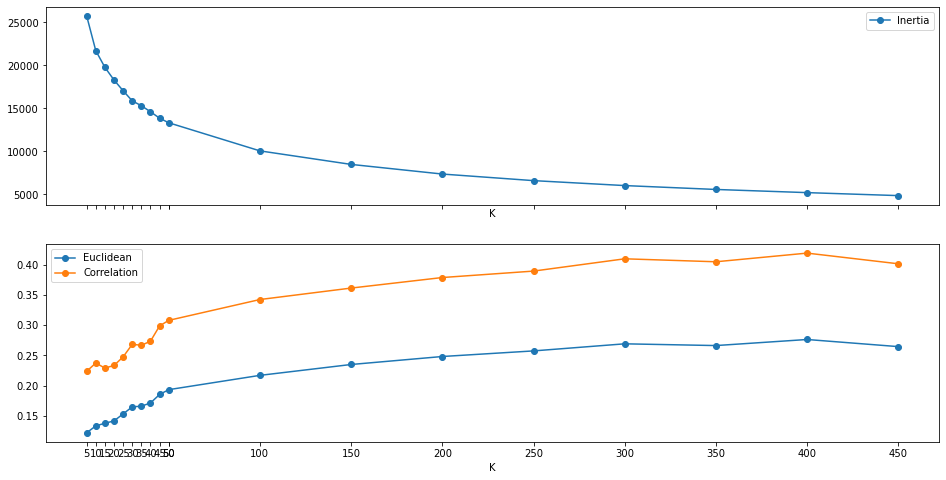

In [83]:
#Model (k-means clustering)
results = dict()
k_cand = list(np.arange(5,55,5))
k_cand.extend(list(np.arange(50,500,50)))

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Xy_scaled)
    score0 = kmeans.inertia_
    score1 = silhouette_score(Xy_scaled,kmeans.labels_,metric='euclidean')
    score2 = silhouette_score(Xy_scaled,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0,'s1':score1,'s2':score2}

fig,axs = plt.subplots(2,1,sharex=True,figsize=(16,8))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10302 samples in 0.247s...
[t-SNE] Computed neighbors for 10302 samples in 10.664s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10302
[t-SNE] Computed conditional probabilities for sample 2000 / 10302
[t-SNE] Computed conditional probabilities for sample 3000 / 10302
[t-SNE] Computed conditional probabilities for sample 4000 / 10302
[t-SNE] Computed conditional probabilities for sample 5000 / 10302
[t-SNE] Computed conditional probabilities for sample 6000 / 10302
[t-SNE] Computed conditional probabilities for sample 7000 / 10302
[t-SNE] Computed conditional probabilities for sample 8000 / 10302
[t-SNE] Computed conditional probabilities for sample 9000 / 10302
[t-SNE] Computed conditional probabilities for sample 10000 / 10302
[t-SNE] Computed conditional probabilities for sample 10302 / 10302
[t-SNE] Mean sigma: 0.458188
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.139145
[t-SNE] KL

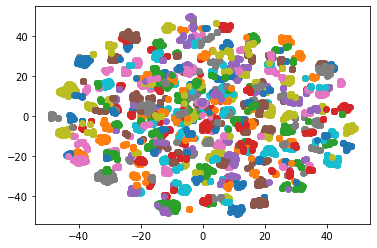

In [84]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne = tsne_model.fit_transform(Xy_scaled)
tsne = pd.DataFrame(tsne)
tsne['k'] = results[400]['k'].labels_

for cluster in np.unique(kmeans.labels_): # plot data by cluster
    plt.scatter(x=tsne.where(tsne['k']==cluster)[0],
                y=tsne.where(tsne['k']==cluster)[1]
               )

D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


CLM_FREQ                    MVR_PTS                         YOJ         \
       mean median       var      mean median       var       mean median   
k                                                                           
0  0.860759      0  1.572845  1.721519    1.0  4.762719  11.995686   12.0   
1  0.772603      0  1.236610  1.868493    1.0  5.477164  11.935423   12.0   

                  TIF  ...        INCOME EDUCATION                   KIDSDRIV  \
        var      mean  ...           var      mean median       var      mean   
k                      ...                                                      
0  5.836283  5.208861  ...  4.467192e+09  2.367089      2  0.233814  0.170886   
1  8.592595  5.271233  ...  7.993324e+08  0.287671      0  0.205479  0.205479   

                    HOMEKIDS                   
  median       var      mean median       var  
k                                              
0      0  0.244497  0.265823    0.0  0.374748  
1      0  0.257113  0.495890    0.0  0.602318  

[2 rows x 42 columns]

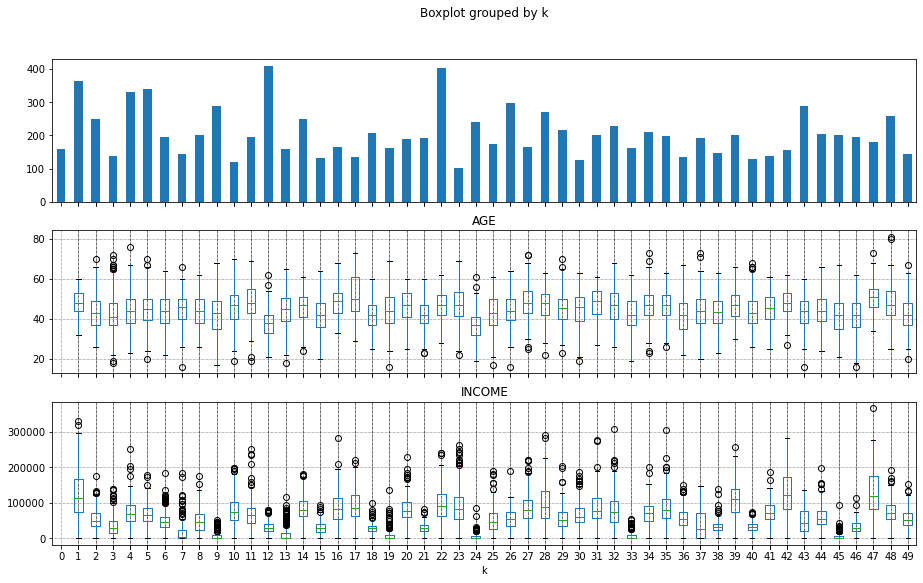

In [85]:
fig,axs = plt.subplots(3,1,figsize=(15,9),sharex=True)
Xy_original['k'] = results[50]['k'].labels_

Xy_original['k'].value_counts().sort_index().plot.bar(ax=axs[0])
Xy_original.boxplot(by='k',column='AGE',ax=axs[1])
Xy_original.boxplot(by='k',column='INCOME',ax=axs[2])

Xy_original.groupby('k').agg(["mean", "median", "var"])[:2]

In [86]:
# drop cluster labels
Xy_original.drop(labels=['k'],axis=1,inplace=True)

In [87]:
from pyclustering.cluster.kmedoids import kmedoids
from scipy.spatial.distance import pdist,squareform

In [88]:
mhv = pdist(Xy_scaled, 'cityblock',)
mh = squareform(mhv,force='tomatrix')
print(f"Data shape: {Xy_original.shape}\nMatrix shape: {mh.shape}")
pd.DataFrame(mh[:3,:3])

Data shape: (10302, 23)
Matrix shape: (10302, 10302)


,0,1,2
0,0.000000,6.360622,6.321582
1,6.360622,0.000000,6.382310
2,6.321582,6.382310,0.000000


Wall time: 1min 16s
Wall time: 2min 49s


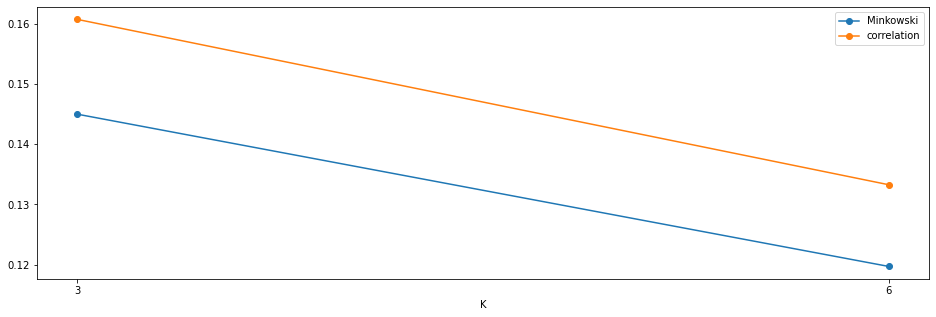

In [89]:
# find k clusters
results_kmedoids = dict()

k_cand = [3,6]

for k in k_cand:
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,1000,size=k)
    kmedoids_instance = kmedoids(mh,
                                 initial_medoids,
                                 data_type='distance_matrix')    

    # run cluster analysis and obtain results
    %time kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    score1 = silhouette_score(mh, cluster_array, metric='precomputed')
    score2 = silhouette_score(Xy_scaled, cluster_array,metric='correlation')
    
    # store
    results_kmedoids[k] = {'k':cluster_array,'s1':score1,'s2':score2}

fig,axs = plt.subplots(1,1,figsize=(16,5))
axs.plot([i for i in results_kmedoids.keys()],[i['s1'] for i in results_kmedoids.values()],'o-',label='Minkowski')
axs.plot([i for i in results_kmedoids.keys()],[i['s2'] for i in results_kmedoids.values()],'o-',label='correlation')
axs.set_xticks(k_cand)
axs.set_xlabel('K')
axs.legend();

In [91]:
import gower

In [92]:
cat = [True if x in categorical_features else False for x in Xy_original.columns]

n = 5
focus = Xy_original.sample(1)
similar = gower.gower_topn(focus,Xy_original,
                           n=n,cat_features=cat)
focus

,CLM_FREQ,MVR_PTS,YOJ,TIF,CAR_AGE,AGE,TRAVTIME,BLUEBOOK,OLDCLAIM,HOME_VAL,...,RED_CAR,GENDER,MSTATUS,URBANICITY,PARENT1,CAR_TYPE,OCCUPATION,EDUCATION,KIDSDRIV,HOMEKIDS
5632,0,3,13.0,1,14.0,67.0,5,17600.0,0.0,0.0,...,NO,F,NO,URBAN,NO,SPRT,DOCTOR,3,0,0.0


In [93]:
print(similar['values'])
Xy_original.iloc[similar['index']]

[0.         0.03632927 0.05338767 0.05365182 0.05689612]


,CLM_FREQ,MVR_PTS,YOJ,TIF,CAR_AGE,AGE,TRAVTIME,BLUEBOOK,OLDCLAIM,HOME_VAL,...,RED_CAR,GENDER,MSTATUS,URBANICITY,PARENT1,CAR_TYPE,OCCUPATION,EDUCATION,KIDSDRIV,HOMEKIDS
5632,0,3,13.000000,1,14.000000,67.0,5,17600.0,0.0,0.0,...,NO,F,NO,URBAN,NO,SPRT,DOCTOR,3,0,0.0
3452,0,1,10.474062,1,16.000000,61.0,10,19040.0,0.0,249869.0,...,NO,F,NO,URBAN,NO,SPRT,DOCTOR,3,0,0.0
195,0,0,12.000000,1,17.000000,42.0,45,13160.0,0.0,0.0,...,NO,F,NO,URBAN,NO,SPRT,DOCTOR,3,0,0.0
10160,0,0,6.000000,1,11.000000,53.0,32,16810.0,0.0,0.0,...,NO,F,NO,URBAN,NO,SPRT,DOCTOR,3,0,0.0
5990,1,1,10.474062,1,8.298148,53.0,24,13350.0,10816.0,0.0,...,NO,F,NO,URBAN,NO,SPRT,DOCTOR,3,0,0.0


In [94]:
# create list of cat_feature indicator
cat = [True if x in categorical_features else False for x in Xy_original.columns]

%time gd = gower.gower_matrix(Xy_original, cat_features=cat)

Wall time: 3min 35s


In [95]:
print(f"Data shape: {Xy_original.shape}\nMatrix shape: {gd.shape}")
pd.DataFrame(gd[:3,:3])

Data shape: (10302, 23)
Matrix shape: (10302, 10302)


,0,1,2
0,0.000000,0.233071,0.202388
1,0.233071,0.000000,0.219521
2,0.202388,0.219521,0.000000


In [96]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [97]:
# condensed matrix
gdv = squareform(gd,force='tovector')

# output matrix has format [idx1, idx2, dist, sample_count]
Z = linkage(gdv,method='complete')
Z_df = pd.DataFrame(Z,columns=['id1','id2','dist','n'])
Z_df[:2]

,id1,id2,dist,n
0,6036.0,9801.0,0.000000,2.0
1,2867.0,8191.0,0.000886,2.0


Leaves = 63


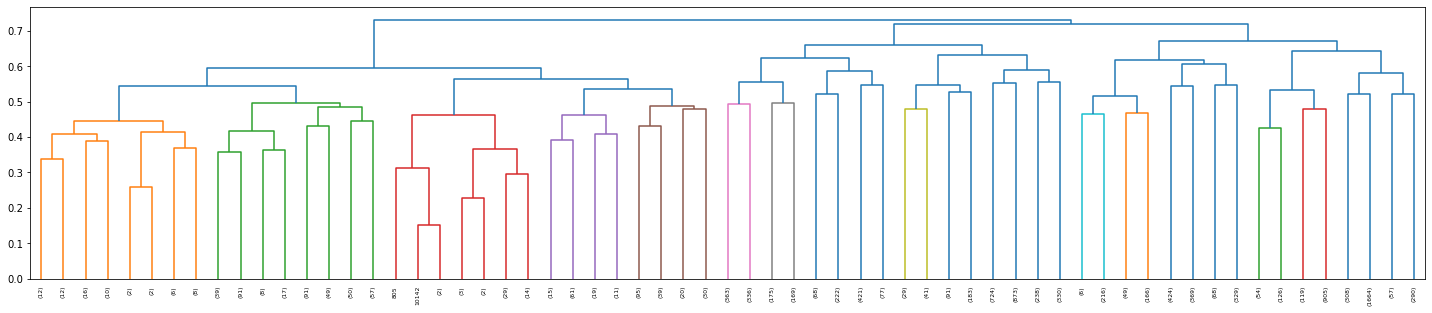

In [98]:
fig,axs = plt.subplots(1,1,figsize=(25,5))
dn = dendrogram(Z, truncate_mode='level',p=5,show_leaf_counts=True,ax=axs);
print(f"Leaves = {len(dn['leaves'])}")

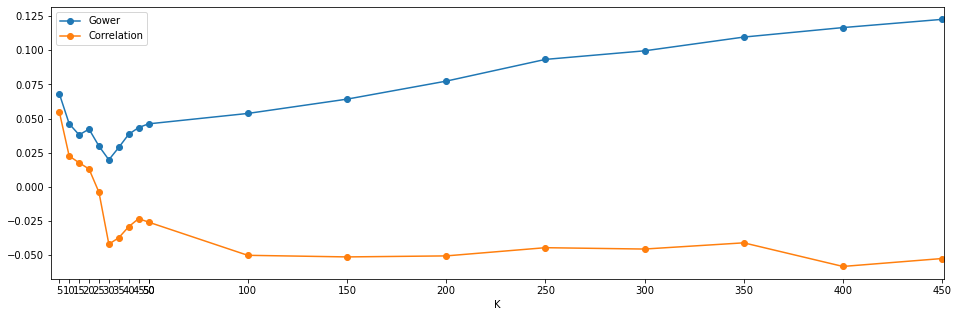

In [101]:
# find k clusters
results = dict()
k_cand = list(np.arange(5,55,5))
k_cand.extend(list(np.arange(50,500,50)))

for k in k_cand:
    cluster_array = fcluster(Z, k, criterion='maxclust')
    score0 = silhouette_score(gd, cluster_array, metric='precomputed')
    score1 = silhouette_score(Xy_scaled, cluster_array,metric='correlation')
    results[k] = {'k':cluster_array,'s0':score0,'s1':score1}
    
fig,axs = plt.subplots(1,1,figsize=(16,5))
axs.plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Gower')
axs.plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Correlation')
axs.set_xlim(1,451)
axs.set_xticks(k_cand)
axs.set_xlabel('K')
axs.legend();

D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


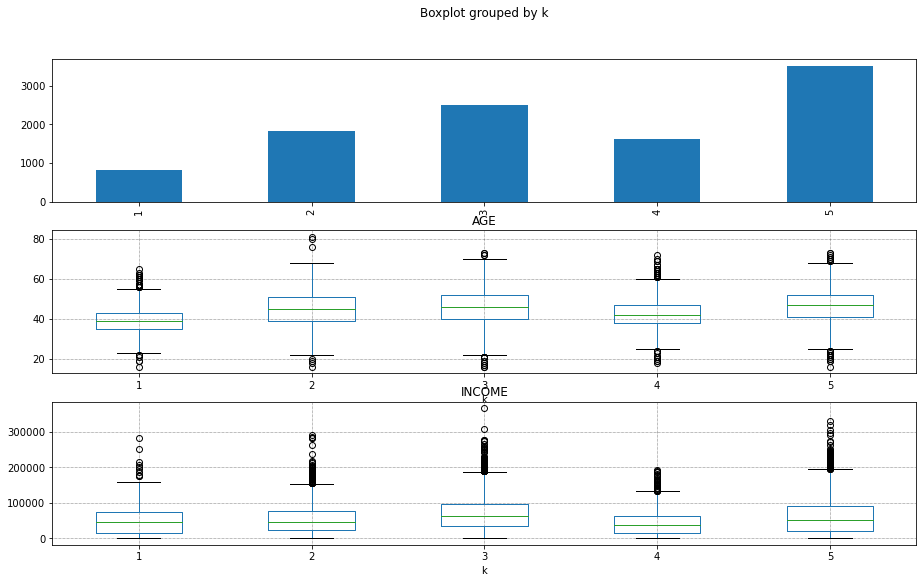

In [102]:
fig,axs = plt.subplots(3,1,figsize=(15,9),sharex=False)
Xy_original['k'] = results[5]['k']

Xy_original['k'].value_counts().sort_index().plot.bar(ax=axs[0])
Xy_original.boxplot(by='k',column='AGE',ax=axs[1])
Xy_original.boxplot(by='k',column='INCOME',ax=axs[2])